**Nombre:** Douglas Alexander Soch Catalán

**Carnet:** 201807032

# SG-Food

_Este es una practica universitaria del curso de Seminario de Sistemas 2, en el cual se realiza el analisis de datos a un archivo .csv_

## 🚀 Comenzando

### 📋 Requerimientos

* [Python 3.12.0](https://www.python.org/downloads/)
```console
python --version
```

### ⚙️ Ejecucion

Se utilizara un entorno virtual para ejecutar la practica con el fin de aislar las dependencias, evitar conflictos entre versiones, y garantizar que el practica tenga su propio entorno reproducible.

Instalar el modulo **virtualenv**

```console
pip install virtualenv
```

Ahora dentro de la carpeta del practica se debe de realizar lo siguiente:

1. Creación del entorno virtual, en este caso llama **venv**

    ```console
    virtualenv venv
    ```

2. Activar entorno virtual

    ```console
    source venv/Scripts/activate
    ```

3. Instalar las dependencias del practica

    ```console
    pip install -r requirements.txt
    ```

## 📖 Documentacion

### 🔠 Inicialización de la practica

El siguiente bloque de código sirve como punto de partida del análisis de datos implementado en Python. Este fragmento de código está diseñado para importar las bibliotecas necesarias y cargar un conjunto de datos desde un archivo CSV.

En la sección de "Librerías a utilizar", se importan tres bibliotecas fundamentales:

* **pandas**: Esta librería es esencial en el análisis de datos en Python. Proporciona estructuras de datos flexibles y poderosas para la manipulación y análisis de datos tabulares.
* **matplotlib.pyplot**: Esta biblioteca es utilizada para la visualización de datos en Python. Ofrece una amplia gama de funciones para crear gráficos y representaciones visuales de los datos.
* **re**: Este módulo proporciona herramientas para trabajar con expresiones regulares en Python, que pueden ser útiles en operaciones de limpieza y procesamiento de datos.

In [360]:
# Librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns  # Importar seaborn para estilos mejorados

# Lee el archivo .csv
df = pd.read_csv('datos.csv')

### ⛲ Limpieza de datos

La sección de limpieza de datos es una parte crucial en cualquier proyecto de análisis de datos, ya que garantiza la calidad y consistencia de los datos antes de realizar cualquier análisis o visualización. El objetivo principal de esta sección es detectar y corregir posibles errores, inconsistencias o valores atípicos en el conjunto de datos cargado previamente.

Los procedimientos aplicados en esta practica son los siguientes:

* Eliminación de valores duplicados
* Eliminación de filas con valores vacios (según ciertos criterios)
* Reemplazo de datos por otros
* Formateo de datos

In [361]:
# Eliminar registros duplicados
df = df.drop_duplicates()

# Eliminacion de filas con valores vacios
df = df.dropna(subset=['Course Title', 'Level', 'Duration', 'Schedule', 'Review', 'Keyword'])

# Reemplazar los valores vacíos con valores especificados
df['Rating'] = df['Rating'].fillna(0)

# Limpiar la columna 'Review'
df['Review'] = df['Review'].str.replace(',', '')  # Eliminar las comas
df['Review'] = df['Review'].str.extract(r'(\d+)', expand=False).astype(float) # Convertir a tipo numérico

# Convertir la columna 'Rating' a tipo numérico
df['Rating'] = pd.to_numeric(df['Rating'])

# Convertir columnas con formato de lista a listas reales
df['Modules'] = df['Modules'].apply(eval)
df['Instructor'] = df['Instructor'].apply(eval)
df['Offered By'] = df['Offered By'].apply(eval)

# Limpiar la columna 'Duration'
def duration_to_hours(duration):
    if pd.isna(duration):
        return duration
    
    # Buscar patrones comunes utilizando expresiones regulares
    minutes_pattern = re.compile(r'(\d+)\s*(?:minute|min)')
    hours_pattern = re.compile(r'(\d+)\s*hour')
    months_pattern = re.compile(r'(\d+) months? at (\d+) hours a week')
    
    total_hours = 0

    # Convertir meses a horas
    months_match = months_pattern.findall(duration)
    if months_match:
        horas_por_mes = int(months_match[0][0]) * int(months_match[0][1]) * 4
        total_hours += horas_por_mes

    else:

        # Buscar y sumar los minutos en el texto
        minutes = minutes_pattern.findall(duration)
        if minutes:
            total_hours += round(float(minutes[0]) / 60, 2)
        
        # Buscar y sumar las horas en el texto
        hours_match = hours_pattern.findall(duration)
        if hours_match:
            total_hours += int(hours_match[0])
    
    return total_hours

df['Duration'] = df['Duration'].apply(duration_to_hours)

### 📑 Calculo promedio de calificaciones de cada curso

Esta sección se centra en el análisis de datos mediante la agrupación y cálculo del promedio de las calificaciones de los cursos.

In [362]:
# Agrupar por el título del curso y calcular el promedio de las calificaciones
promedio_calificaciones = df.groupby('Course Title')['Rating'].mean().sort_values(ascending=False)

# Mostrar el resultado
promedio_calificaciones

Course Title
Desenvolvendo sua musicalidade                                                5.0
Diversity, Equity, and Inclusion for Organizational Leaders Specialization    5.0
Manajemen Proyek Google Professional Certificate                              5.0
O Músico Contemporâneo Specialization                                         5.0
Global Health Challenges and Governance Specialization                        5.0
                                                                             ... 
Frontend Development using React  Specialization                              3.2
刑法学总论 Criminal Law                                                            3.1
Software Architecture for Big Data Specialization                             3.1
Deep Learning for Healthcare Specialization                                   3.1
Selenium WebDriver with Python                                                3.1
Name: Rating, Length: 4053, dtype: float64

#### Análisis

Este reporte constituye un enfoque eficaz para condensar y analizar las calificaciones de los cursos mediante la agrupación y el cálculo de promedios. Esta metodología facilita la comprensión de las tendencias y patrones que cada curso está siguiendo.

Los resultados obtenidos de los primeros 10 registros revelan que el promedio de calificaciones de cada curso oscila entre 3.1 y 5.

### 📑 Calculo del curso con mayor y menor 'Rating'

Esta sección se enfoca en identificar los cursos con el mayor y el menor rating dentro del conjunto de datos.

In [363]:
# Calcular los cursos con mayor y menor rating
curso_max_rating = df.loc[df['Rating'].idxmax()]
curso_min_rating = df.loc[df['Rating'].idxmin()]

print("Curso con mayor rating:")
print(curso_max_rating)

print("\nCurso con menor rating:")
print(curso_min_rating)

Curso con mayor rating:
Course Title                              Songwriting: Writing the Music
Rating                                                               5.0
Level                                                 Intermediate level
Duration                                                              11
Schedule                                               Flexible schedule
Review                                                              43.0
What you will learn                                                  NaN
Skill gain             ['Music', 'Melodic Hooks', 'Songwriting', 'Har...
Modules                [Welcome to Songwriting: Writing the Music, Ch...
Instructor                                                [Scarlet Keys]
Offered By                                                     [Berklee]
Keyword                                              Arts and Humanities
Course Url             https://www.coursera.org/learn/songwriting-wri...
Name: 166, dtype: object

C

#### Análisis

Este reporte ofrece una manera rápida y eficiente de identificar los cursos con los ratings más altos y más bajos dentro del conjunto de datos.

En el resultado obtenido se puede visualizar lo siguiente:

* **Curso con mayor rating**: Songwriting: Writing the Music (Puntaje: 5)
* **Curso con menor rating**: Software Architecture for Big Data Specialization (Puntaje: 3.1)

### 📑 Porcentaje de cursos con horario flexible

Esta sección se enfoca en analizar el conjunto de datos de cursos para determinar el porcentaje de cursos que ofrecen horarios flexibles.

In [364]:
# Contar el numero total de cursos
total_cursos = len(df)

# Contar el numero de cursos con horario flexible
cursos_horario_flexible = df[df['Schedule'] == 'Flexible schedule']
num_cursos_horario_flexible = len(cursos_horario_flexible)

# Calcular el porcentaje
porcentaje_horario_flexible = (num_cursos_horario_flexible / total_cursos) * 100

# Imprimir el resultado
print("Porcentaje de cursos con horario flexible: {:.2f}%".format(porcentaje_horario_flexible))

Porcentaje de cursos con horario flexible: 100.00%


#### Análisis

Este reporte es valioso para comprender la disponibilidad de horarios entre los cursos y puede ser útil para aquellos que buscan flexibilidad en sus compromisos de estudio.

El resultado indica que el 100% de los cursos, con un cronograma establecido, ofrecen horarios flexibles. Esto es beneficioso para los estudiantes que buscan adaptar sus horarios según su conveniencia.

### 📊 Numero de cursos según su nivel de dificultad

Esta sección se enfoca en analizar el numero de cursos según su nivel de dificultad y visualizar esta información mediante un gráfico de barras.

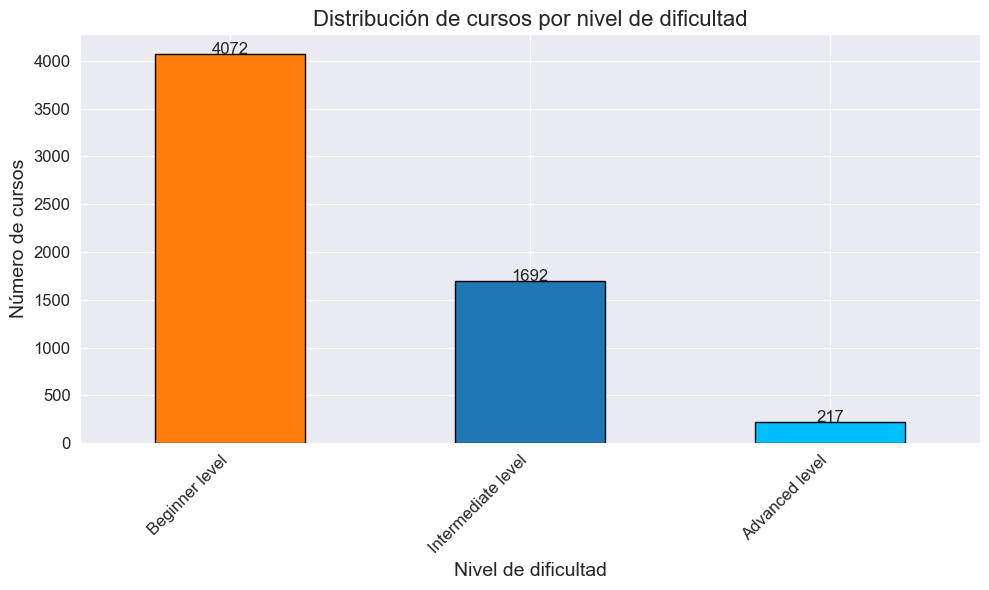

In [365]:
# Calcular el numero de cursos en cada nivel de dificultad
cursos_por_nivel = df['Level'].value_counts()

# Definir colores
colors = ['#ff7f0e', '#1f77b4', 'deepskyblue']

# Generar la gráfica de barras
plt.figure(figsize=(10, 6))
cursos_por_nivel.plot(kind='bar', color=colors, edgecolor='black')

# Agregar etiquetas y título
plt.title('Distribución de cursos por nivel de dificultad', fontsize=16)
plt.xlabel('Nivel de dificultad', fontsize=14)
plt.ylabel('Número de cursos', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Agregar valores en las barras
for i, value in enumerate(cursos_por_nivel):
    plt.text(i, value + 0.1, str(value), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

#### Análisis

Este reporte es útil para comprender la diversidad de niveles de dificultad dentro del conjunto de cursos y puede proporcionar información valiosa sobre las preferencias de los estudiantes o las áreas de enfoque de la plataforma educativa.

Los resultados muestran que la mayoría de los cursos tienen un nivel de dificultad 'Principiante', con más de 4000 cursos en esta categoría. En segundo lugar, el nivel de dificultad 'Intermedio' cuenta con menos de 2000 cursos. Por último, se observa que el nivel 'Avanzado' tiene la menor cantidad de cursos, con menos de 500 según el gráfico.

### 📊 Numero de cursos según su categoría

Esta sección se enfoca en analizar las principales categorías de cursos y visualizar la distribución del número de cursos en cada una de ellas mediante un gráfico de barras horizontales.

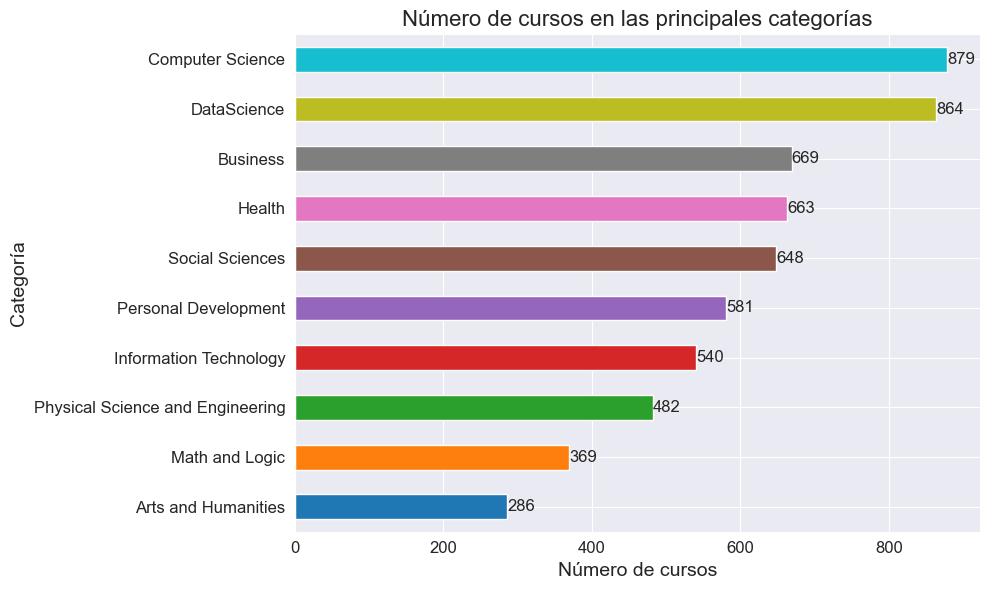

In [366]:
# Contar el numero de cursos en las principales categorías
top_categorias = df['Keyword'].value_counts().head(10)

# Lista de colores variados
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Generar la gráfica de barras horizontales
plt.figure(figsize=(10, 6))
top_categorias.sort_values().plot(kind='barh', color=colors)
plt.title('Número de cursos en las principales categorías', fontsize=16)
plt.xlabel('Número de cursos', fontsize=14)
plt.ylabel('Categoría', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Agregar valores en las barras
for i, value in enumerate(top_categorias.sort_values()):
    plt.text(value + 0.1, i, str(value), va='center', fontsize=12)

plt.tight_layout()
plt.show()

#### Análisis

Este reporte permite identificar las áreas más populares dentro del conjunto de cursos y puede proporcionar información valiosa sobre las preferencias de los estudiantes debido a que hay una mayor cantidad de cursos de esa categoría.

El resultado muestra que las categorías con mayor cantidad de cursos son, "Computer Science" y "DataScience" el cual son más de 800 cursos para cada uno. Por otra parte, las categorías que tienen una menor cantidad de cursos son, "Math and Logic" y "Arts and Humanities", el cual, representa menos de 400 cursos.

El orden final de la cantidad de cursos que tiene cada categoría es la siguiente:

1. Computer Science (Aprox. más de 800 cursos)
2. DataScience (Aprox. más de 800 cursos)
3. Business (Aprox. más de 600 cursos)
4. Health (Aprox. más de 600 cursos)
5. Social Sciences (Aprox. más de 600 cursos)
6. Personal Development (Aprox. 600 cursos)
7. Information Technology (Aprox. más de 400 cursos)
8. Physical Science and Engineering (Aprox. más de 400 cursos)
9. Math and Logic (Aprox. 400 cursos)
10. Arts and Humanities (Aprox. más de 200 cursos)

### 📊 Relación entre la duración del curso y el numero de revisiones

Esta sección se centra en visualizar la relación entre la duración de los cursos y el número de revisiones que han recibido mediante un gráfico de dispersión (scatter plot).

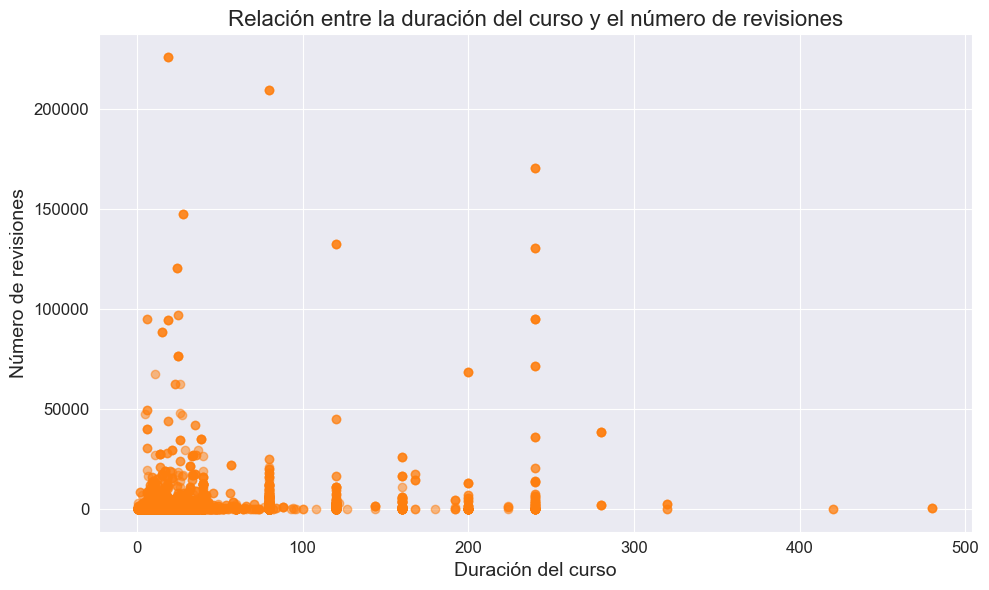

In [367]:
# Establecer estilo de fondo
sns.set_style("darkgrid")

# Generar la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Review'], color='#ff7f0e', alpha=0.5)
plt.title('Relación entre la duración del curso y el número de revisiones', fontsize=16)
plt.xlabel('Duración del curso', fontsize=14)
plt.ylabel('Número de revisiones', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Análisis

Este informe resulta útil para detectar patrones, tendencias o relaciones entre dos variables numéricas, en este caso, 'Duración' y 'Revisiones'. Esto puede ayudar a determinar si existe alguna correlación entre estas dos variables dentro del conjunto de datos de los cursos.

Según los resultados mostrados en la gráfica, se observa que hay menos revisiones en relación con la duración del curso. Esto sugiere que a medida que la duración del curso disminuye, tiende a haber menos revisiones.

### 📊 Distribución de las duraciones de los cursos

Esta sección se centra en visualizar la distribución de las duraciones de los cursos mediante un histograma.

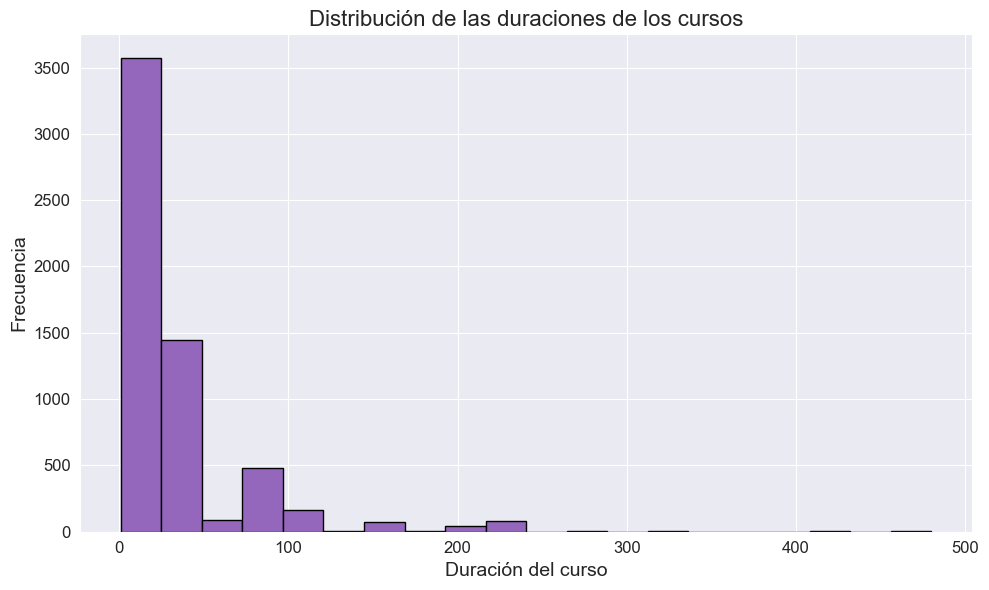

In [368]:
# Generar la gráfica
plt.figure(figsize=(10, 6))
plt.hist(df['Duration'], bins=20, color='#9467bd', edgecolor='black')
plt.title('Distribución de las duraciones de los cursos', fontsize=16)
plt.xlabel('Duración del curso', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Análisis

Este reporte proporciona una visualización efectiva de la distribución de las duraciones de los cursos, lo que permite comprender mejor cómo se distribuyen los diferentes intervalos de duración en el conjunto de datos. Esto puede ser útil para identificar patrones o características destacadas en la duración de los cursos.

De acuerdo con la gráfica obtenida, se nota que hay una mayor cantidad de cursos cuando la duración es corta, especialmente menos de 100 horas. Por otro lado, a medida que la duración del curso aumenta, la cantidad de cursos disminuye. Este patrón se hace evidente cuando los cursos tienen una duración superior a 100 horas, donde la disponibilidad de cursos tiende a ser menor, llegando en algunos casos a 0.

### 📊 Calificación de los cursos por nivel de dificultad

Esta sección se centra en visualizar la distribución de las calificaciones de los cursos según su nivel de dificultad mediante un diagrama de caja (boxplot).

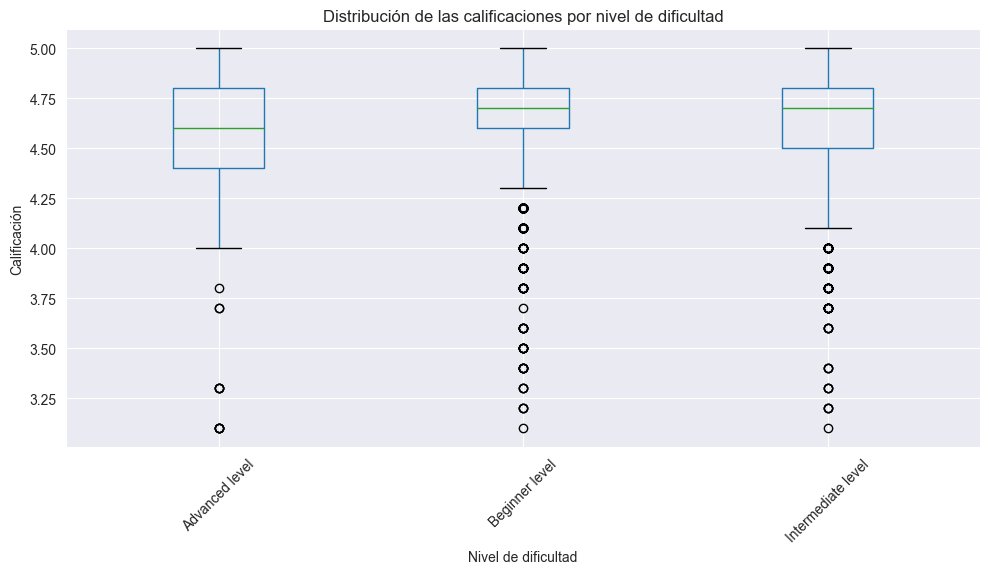

In [369]:
# Generar la gráfica
df.boxplot(column='Rating', by='Level', figsize=(10, 6))
plt.title('Distribución de las calificaciones por nivel de dificultad')
plt.suptitle('')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Calificación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Análisis

Este reporte proporciona una visualización efectiva de la distribución de las calificaciones de los cursos según su nivel de dificultad, lo que permite comparar la dispersión y la mediana de las calificaciones entre diferentes niveles de dificultad. Esto puede ser útil para identificar si hay diferencias significativas en el rendimiento de los cursos según su nivel de dificultad.

A pesar de observar puntos que están fuera de los rangos establecidos de notas, se puede apreciar una tendencia que sigue cada nivel de dificultad.

Según los resultados obtenidos se puede visualizar que los rangos de notas de los cursos son las siguientes:

* Nivel Avanzado: [4.25, 4.80]
* Nivel Intermedio: [4.50, 4.80]
* Nivel Basico: [4.60, 4.80]

Además las medías obtenidas son las siguientes (Aprox.):

* Nivel Avanzado: 4.60
* Nivel Intermedio: 4.70
* Nivel Basico: 4.70

Por lo tanto, se puede concluir que, según los rangos de las notas, la media establece un patrón constante entre los cuartiles de dichos rangos.

---

### Conclusión

El análisis de datos revela información sobre una serie de cursos, desde la carga inicial de datos hasta la visualización y exploración de diversas características. Se utilizaron varias técnicas y herramientas de análisis de datos en Python para extraer información valiosa y comprender la distribución, relaciones y tendencias dentro del conjunto de datos.

Se exploraron diferentes aspectos de los cursos, como calificaciones, duración, categorías y niveles de dificultad, utilizando una variedad de visualizaciones.

### Uso de Python en el analisis de datos

Python es una herramienta poderosa y versátil en el análisis de datos gracias a bibliotecas como Pandas, NumPy y Matplotlib, entre otras. Algunas ventajas clave de Python incluyen:

* Facilidad de uso: accesible para usuarios de diferentes niveles de experiencia.
* Amplia gama de bibliotecas especializadas en análisis de datos.
* Flexibilidad para adaptarse a diferentes necesidades y casos de uso.
* Comunidad activa que contribuye con recursos y soporte.